<a href="https://colab.research.google.com/github/JoaoPauloSousaCoelho/Joao-Paulo/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [445]:
class Perceptron:
  def __init__(self, set_seed, num_epochs = 1000, lr = 0.1, print_errors = True,
               acc_threshold = 1.0):
    self.num_epochs = num_epochs
    self.lr = lr
    self.print_errors = print_errors
    self.set_seed = set_seed
    self.accs = []
    self.acc_threshold = acc_threshold

  def initialize_weights(self):
    np.random.seed(self.set_seed)
    self.weights = np.array([np.random.rand(), np.random.rand(), np.random.rand()])

  def signal(self, X):
    Z = np.dot(self.weights.T, X)
    return np.where(Z>=0, 1, -1)

  def fit(self, X, y_real):
    self.initialize_weights()
    for i in range(self.num_epochs):
      y_pred = self.signal(X)
      errors = y_real - y_pred
      erro = np.abs(np.sum(errors))
      acc = np.sum(y_pred == y_real)/len(y_real)
      self.accs.append(acc)
      if self.print_errors and i%10:
        print(f'Epoch {i:3d} -- Erro: {np.sum(erro)} -- Accuracy: {acc:.2f}')
      if (erro >= 1e-6) and (acc < self.acc_threshold):
        self.weights[0] =self.weights[0] + self.lr*np.dot(errors, X[0])
        self.weights[1] = self.weights[1] + self.lr*np.dot(errors, X[1])
        self.weights[2] = self.weights[2] + self.lr*np.dot(errors, X[2])
      else:
        break
  def predict(self, X_test):
    return -self.weights[0]/self.weights[2] - (self.weights[1]/self.weights[2])*X_test


In [453]:
N = 100
SEED = 32
np.random.seed(SEED)
x_1 = np.random.uniform(0.4, 1.0, N)
y_1 = np.random.uniform(0.4, 1.0, N)
x_2 = np.random.uniform(0,0.5, N)
y_2 = np.random.uniform(0,0.5, N)
y_real_1 =-np.ones(N)
y_real_2 = np.ones(N)
y_real = np.concatenate([y_real_1, y_real_2])
x = np.concatenate([x_1, x_2])
y = np.concatenate([y_1, y_2])
X = np.vstack((np.ones(len(x)),x,y))

modelo = Perceptron(set_seed = SEED)
modelo.fit(X,y_real)

Epoch   1 -- Erro: 200.0 -- Accuracy: 0.50
Epoch   2 -- Erro: 200.0 -- Accuracy: 0.50
Epoch   3 -- Erro: 200.0 -- Accuracy: 0.50
Epoch   4 -- Erro: 200.0 -- Accuracy: 0.50
Epoch   5 -- Erro: 198.0 -- Accuracy: 0.51
Epoch   6 -- Erro: 200.0 -- Accuracy: 0.50
Epoch   7 -- Erro: 24.0 -- Accuracy: 0.94
Epoch   8 -- Erro: 2.0 -- Accuracy: 0.98
Epoch   9 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  11 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  12 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  13 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  14 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  15 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  16 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  17 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  18 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  19 -- Erro: 2.0 -- Accuracy: 0.98
Epoch  21 -- Erro: 0.0 -- Accuracy: 0.98


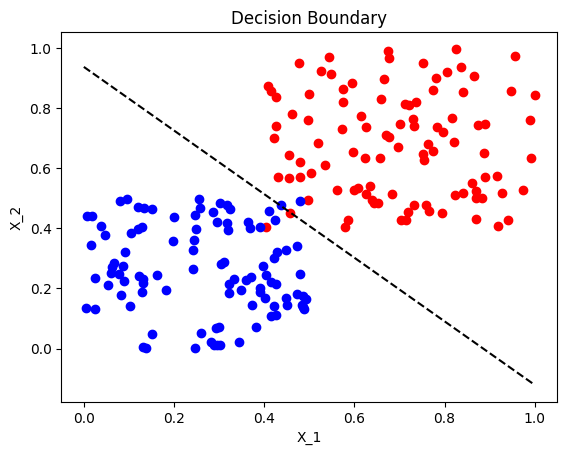

In [454]:
X_test = np.linspace(0, 1, 200)
predictions = modelo.predict(X_test)
ax = plt.subplot()
ax.scatter(x_1, y_1, c = 'red')
ax.scatter(x_2, y_2, c = 'blue')
ax.plot(X_test, predictions, c = 'black', linestyle='dashed')
plt.title('Decision Boundary')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()